# BASICS 04 - Some hacks

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import cv2
import time
import os
import pickle
from mix_Network import *

# 1. Initialisation of the time-surfaces (TS)
## 1.1. In Lagorce 2017, initialisation is done with the first N TS

In [3]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)

## 1.2. Random initialisation of the TS 

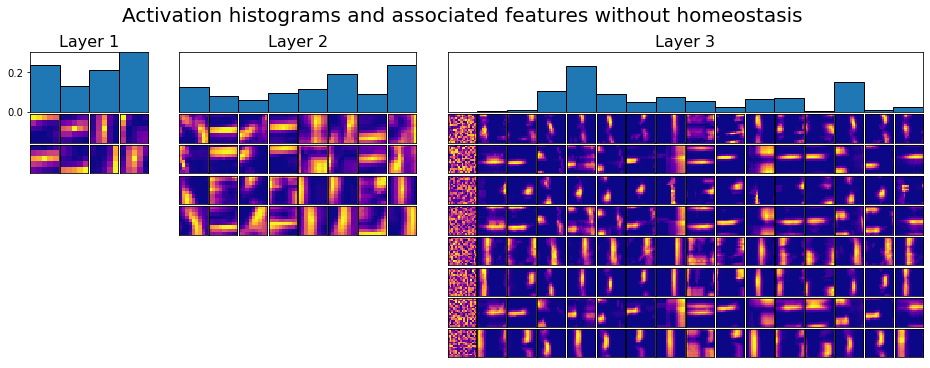

In [4]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_randominit.pkl"
if not os.path.isfile(fname):
    hotsrdn = network(algo='lagorce', krnlinit='rdn')
    hotsrdn.learninglagorce()
    hotsrdn.plotlayer()
    trainmaprdn = hotsrdn.traininglagorce()
    testmaprdn = hotsrdn.testinglagorce(trainmaprdn)
    with open(fname, 'wb') as file:
        pickle.dump([hotsrdn, trainmaprdn, testmaprdn], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsrdn, trainmaprdn, testmaprdn = pickle.load(file)
    hotsrdn.plotlayer()

# 2. Denoising
## 2.1 Filtering only the TS on the first layer 

In [5]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)

## 2.2 Filtering TS on every layer

100%|██████████| 558235/558235 [04:57<00:00, 1879.26it/s]


bhatta:97.5% - eucli:95.0% - norm:95.0%


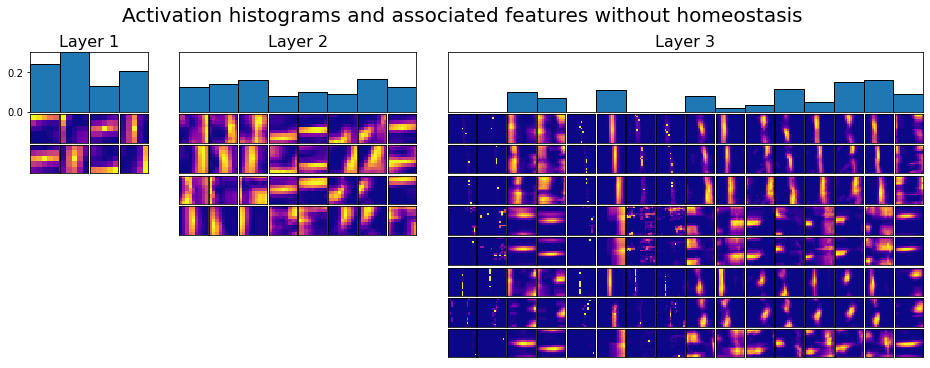

In [6]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filterall.pkl"
if not os.path.isfile(fname):
    hotsfilt = network(algo='lagorce', krnlinit='first')
    hotsfilt.learninglagorce(filtering='all')
    hotsfilt.plotlayer()
    trainmapfilt = hotsfilt.traininglagorce()
    testmapfilt = hotsfilt.testinglagorce(trainmapfilt)
    with open(fname, 'wb') as file:
        pickle.dump([hotsfilt, trainmapfilt, testmapfilt], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfilt, trainmapfilt, testmapfilt = pickle.load(file)
    hotsfilt.plotlayer()

## 2.3. Applying stronger filter (2*R -> 5*R)

100%|██████████| 558235/558235 [05:05<00:00, 1824.34it/s]


bhatta:100.0% - eucli:92.5% - norm:92.5%


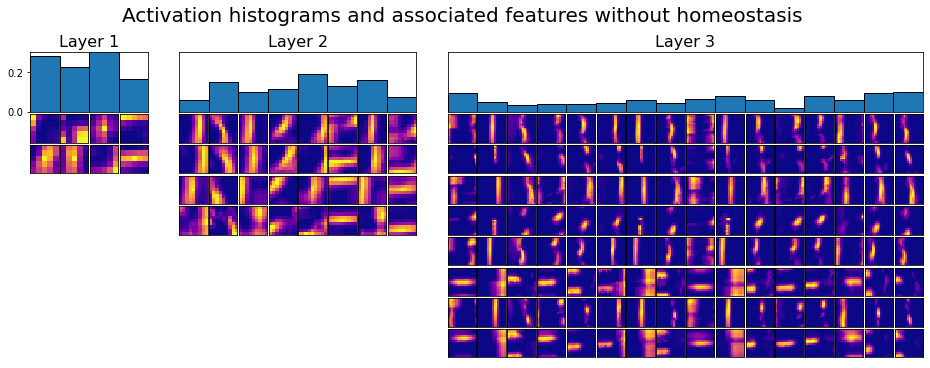

In [7]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filtx5.pkl"
if not os.path.isfile(fname):
    hotsfiltx5 = network(algo='lagorce', krnlinit='first', filt=5)
    hotsfiltx5.learninglagorce(filtering='all')
    hotsfiltx5.plotlayer()
    trainmapfiltx5 = hotsfiltx5.traininglagorce()
    testmapfiltx5 = hotsfiltx5.testinglagorce(trainmapfiltx5)
    with open(fname, 'wb') as file:
        pickle.dump([hotsfiltx5, trainmapfiltx5, testmapfiltx5] , file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfiltx5, trainmapfiltx5, testmapfiltx5 = pickle.load(file)
    hotsfiltx5.plotlayer()

# 3. Filtering of the TS